# Perform an A/B Test for ad campaign using python 

<img src="files/ab-testing.png" width="200">

<div>Icons made by <a href="https://flat-icons.com/" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>




<br>

### AB testing is essentially an experiment where two or more variants are evaluated by  statistical analysis to determine which variation performs better for a given conversion goal
<br>

### You are hired by a digital marketing agency that designed a new ad for their client and This ad is hosted on a website .They hired you to do an A/B test to advise them on whether they should go for the new ad or not .

## Task one : Load the dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
#load the dataset
df = pd.read_excel('AB Test.xlsx')

In [3]:
#show the dataframe head
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [4]:
#show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


# Task Two : Set up the hypothesis testing steps


In [5]:
# Find insights in our data
# Method 1
exp_count = len(df[df['group'] == 'experiment'])
ctrl_count = len(df[df['group'] == 'control'])

print('Experiment:', exp_count)
print('Control:', ctrl_count)

# Method 2
df['group'].value_counts()

# Experiement Group: Samples that received the new advertisement
# Control: Samples that did not receive the new advertisement

Experiment: 1881
Control: 1876


experiment    1881
control       1876
Name: group, dtype: int64

In [6]:
# Find insights in our data
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

### experiment group : 
the group that is involved in the new experiment . i.e the group that received the new ad . 
### Control group : 
the 2nd group that didn't receive the new ad
### Click-through rate (CTR) : 
the number of clicks advertisers receive on their ads per number of impressions.


## Task Three : Compute the difference in the click-through rate 

In [7]:
# Purpose: You want to find out if the differnece in CTR is due to the new ad
# To prove statistically that this is true, you use A/B Testing

# Get dataframe with all observations from control group 
ctrl_group = df[df['group'] == 'control']

# Compute CTR for control group 
CTR_ctrl_group = len(ctrl_group[ctrl_group['action'] == 'view and click']) / len(ctrl_group)

# Display the CTR For the control group
print(CTR_ctrl_group)

0.19349680170575692


In [8]:
# Alternative Method --> Using df.query
ctrl_group = df.query('group=="control"')

CTR_ctrl_group = len(ctrl_group.query('action=="view and click"')) / len(ctrl_group)

print(CTR_ctrl_group)

0.19349680170575692


In [9]:
# Get dataframe with all records from experiment group 
exp_group = df[df['group'] == 'experiment']

# Compute click through rate for experiment group 
CTR_exp_group = len(exp_group[exp_group['action'] == 'view and click']) / len(exp_group)

# Display the CTR For the experiment group
print(CTR_exp_group)

0.16586921850079744


In [10]:
# Compute the difference in the CTR 
diff = CTR_exp_group - CTR_ctrl_group

# Display the difference 
print(diff)

-0.027627583204959477


# Task four : create sample distribution using bootsrapping

## Bootstrapping : 
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

## Example : 
Bootstrapping in statistics, means sampling with replacement.
so if we have a group of individuals and , and want to bootsrap sample of ten individuals from this group , we could randomly sample any ten individuals but with bootsrapping, we are sampling with replacement so we could actually end up sampling 7 out of the ten individuals and three of the previously selected individuals might end up being sampled again

<img src="files/Bootstrapping.png" width="600">

In [18]:
# Bootsrapping
differences = []
sample_size = len(df)

# Bootstrap 10000 times
for i in range(10000):
    sample = df.sample(sample_size, replace=True) # Bootstrap is sampling with replacement
    ctrl_group = sample[sample['group'] == 'control']
    exp_group = sample[sample['group'] == 'experiment']
    
    CTR_ctrl_group = len(ctrl_group.query('action=="view and click"')) / len(ctrl_group)
    CTR_exp_group = len(exp_group.query('action=="view and click"')) / len(exp_group)
    
    diff = CTR_exp_group - CTR_ctrl_group
    differences.append(diff)

# Task five : Evaluate the null hypothesis and draw conclustions.

### The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

(array([  23.,  185.,  689., 1721., 2537., 2465., 1600.,  583.,  169.,
          28.]),
 array([-0.07073934, -0.06202178, -0.05330421, -0.04458665, -0.03586908,
        -0.02715151, -0.01843395, -0.00971638, -0.00099881,  0.00771875,
         0.01643632]),
 <BarContainer object of 10 artists>)

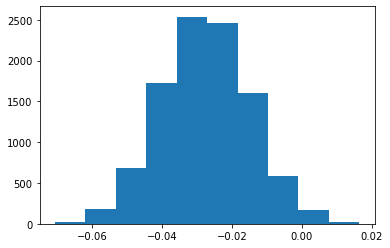

In [19]:
# Plot the sampling distribution 
differences = np.array(differences)
plt.hist(differences)

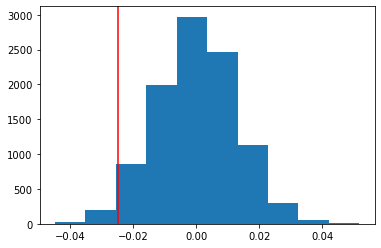

In [23]:
# Simulate the distribution under the null hypothesis 
H0 = np.random.normal(0, differences.std(), differences.size)


# Plot the null distribution 
# diff is the difference between CTR of experiment & control of original dataset
plt.hist(H0)
plt.axvline(diff, c='red')


In [21]:
differences.std()

0.012694748358878427

###  The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

###  i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [29]:
# Compute the  P-value 
# This is essentially a len(h0 > diff) / len(h0)
# Meaning 97.31% of H0 are greater than the difference
(H0 > diff).mean()

0.9731

In [58]:
def perform_abtest(data):
    # Reading in data according to data file extension
    if '.xlsx' in data:
        try:
            df = pd.read_excel(data)
        except:
            return 'Invalid file provided. Please try again'
    elif '.csv' in data:
        try:
            df = pd.read_csv(data)
        except:
            return 'Invalid file provided. Please try again'
    
    
    # Get dataframe with all observations from control group 
    # Get dataframe with all records from experiment group 
    ctrl_group = df[df['group'] == 'control']
    exp_group = df[df['group'] == 'experiment']
    
    # Compute CTR for control group 
    # Compute click through rate for experiment group 
    CTR_ctrl_group = len(ctrl_group[ctrl_group['action'] == 'view and click']) / len(ctrl_group)   
    CTR_exp_group = len(exp_group[exp_group['action'] == 'view and click']) / len(exp_group)
    
    # Compute difference between CTR of control & experiment group
    diff = CTR_exp_group - CTR_ctrl_group

 
    # Bootsrapping
    differences = []
    sample_size = len(df)

    # Bootstrap 10000 times
    for i in range(10000):
        sample = df.sample(sample_size, replace=True) # Bootstrap is sampling with replacement
        bs_ctrl_group = sample[sample['group'] == 'control']
        bs_exp_group = sample[sample['group'] == 'experiment']
    
        bs_CTR_ctrl_group = len(bs_ctrl_group.query('action=="view and click"')) / len(bs_ctrl_group)
        bs_CTR_exp_group = len(bs_exp_group.query('action=="view and click"')) / len(bs_exp_group)
    
        bs_diff = bs_CTR_exp_group - bs_CTR_ctrl_group
        differences.append(bs_diff)
    
    differences = np.array(differences)
    H0 = np.random.normal(0, differences.std(), differences.size)
    p_value = (H0 > diff).mean()
    
    if p_value < 0.05:
        print('P-Value:', p_value, ' Reject H0')
    else:
        print('P-Value:', p_value, ' Reject HA')

In [59]:
perform_abtest('AB Test.xlsx')

P-Value: 0.9869  Reject HA
